## IMPORTING IMPORTANT LIBRARIES

In [1]:
# Importing Numeric Python
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Data Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

# Filter warning
from warnings import filterwarnings
filterwarnings('ignore')

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Linear Regression Libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Regularization Technique
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# GridSearch and Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

## IMPORTING DATAFRAME

In [762]:
df = pd.read_csv('globalterrorismdb_0718dist.csv')
df.iloc[0:5,0:11]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia


In [766]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [109]:
df.iloc[0:5,0:25]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN


In [55]:
df.iloc[0:5,25:36]

,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt
0,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property
1,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic)
2,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media
3,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic)
4,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic)


In [57]:
df.iloc[0:5,36:50]

,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt
0,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df.iloc[0:5,50:65]

,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df.iloc[0:5,65:80]

,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt
0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df.iloc[0:5,80:100]

,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus
0,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN
4,NaN,8,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incendiary,NaN,NaN


In [61]:
df.iloc[0:5,100:120]

,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid
0,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN
2,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [62]:
df.iloc[0:5,120:]

,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# COLUMNS MEANING OF THE DATA 

1. eventid --> A 12-digit Event ID system. First 8 numbers – date recorded “yyyymmdd”. Last 4 numbers – sequential
2. iyear --> This field contains the year in which the incident occurred.
3. imonth --> This field contains the number of the month in which the incident occurred.
4. idate --> This field contains the numeric day of the month on which the incident occurred.
5. approxdate --> None
6. extended --> 1 = "Yes" The duration of an incident extended more than 24 hours. 0 = "No" The duration of an incident extended less
7. resolution --> on which date conflict got resolved
8. country --> This field identifies the country code
9. country_txt --> This field identifies the country or location where the incident occurred.
10. region --> This field identifies the region code based on 12 regions
11. region_txt --> This field identifies the region in which the incident occurred.
12. provstate --> Name (at the time of event) of the 1st order subnational administrative region
13. city --> Name of the city, village, or town in which the incident occurred
14. latitude --> The latitude of the city in which the event occurred.
15. longitude --> The longitude of the city in which the event occurred.
16. specificity --> It is related to the location details of the incident like latitude and longitude
17. nkill --> The number of total confirmed fatalities for the incident
18. nkillus --> number of us citizen died 
19. nperps --> The total number of terrorists participating in the incident
20. success --> Success of a terrorist strike
21. suicide --> 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide
22. attacktype1 --> The general method of attack
23. attacktype1_txt --> The general method of attack and broad class of tactics used.
24. targtype1 --> The general type of target/victim
25. targtype1_txt -->The general type of target/victim
26. targsubtype_txt --> The more specific target category
27. target1 --> The specific person, building, installation that was targeted and/or victimized
28. natlty1 --> The nationality of the target that was attacked
29. natlty1_txt -- > The nationality of the target that was attacked
30. gname -->The name of the group that carried out the attack
31. guncertain -->  if gun was involved or not
32. weapontype_txt --> General type of weapon used in the incident
33. weaponsubtype1_txt --> More specific value for most of the Weapon Types

# NULL VALUE AND MISSING VALUE ANALYSIS

In [187]:
# CREATING THE DATAFRAME
null_value_df = pd.DataFrame()

# DOING NULL VALUE ANALYSIS
null_value_data_list = list(df.isnull().sum()/len(df)*100)

# Adding null value in Data Frame
null_value_df['Columns'] = df.columns
null_value_df['Null Value'] = null_value_data_list

# Seeing Null Value Data Frame
null_value_df.head()

,Columns,Null Value
0,eventid,0.000000
1,iyear,0.000000
2,imonth,0.000000
3,iday,0.000000
4,approxdate,94.914993


### COLUMNS WHERE NULL VALUE IS 100% OR MORE THAN 99%

In [201]:
null_value_df.sort_values(by='Null Value',ascending=False)[null_value_df['Null Value']>99.0]

,Columns,Null Value
63,gsubname3,99.988992
96,weapsubtype4_txt,99.961473
95,weapsubtype4,99.961473
93,weaptype4,99.959822
94,weaptype4_txt,99.959822
78,claimmode3,99.926799
79,claimmode3_txt,99.926799
61,gsubname2,99.911938
77,claim3,99.824978
67,guncertain3,99.823877


Interpretation : Where Null Value is More than 99% are irrelevent to our data analysis but as we don't have any domain knowledge we need to check use of each and every columns and then we can drop these columns

## COLUMNS WHERE THERE IS ZERO NULL VALUES

In [365]:
null_value_df[null_value_df['Null Value']==0.00]

,Columns,Null Value
0,eventid,0.0
1,iyear,0.0
2,imonth,0.0
3,iday,0.0
5,extended,0.0
7,country,0.0
8,country_txt,0.0
9,region,0.0
10,region_txt,0.0
16,vicinity,0.0


## CITY AND PROVSTATE

#### DOING EDA ON PROVSTATE AND CITY WHERE VALUE IS UNKOWN

In [297]:
df.iloc[:,5:20][(df['city']=='Unknown')&(df['provstate']=='Unknown')&(df['latitude'].isnull()==False)]

,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1
76864,0,NaN,205,Thailand,5,Southeast Asia,Unknown,Unknown,6.774536,100.912508,3.0,0,NaN,08/06/2004: A retired Thai police officer was ...,1
79009,0,NaN,195,Sudan,11,Sub-Saharan Africa,Unknown,Unknown,13.581508,24.801699,2.0,0,The incident occurred in the Aro Sharow refuge...,09/29/2005: Armed Arab militia members riding ...,1
82729,0,NaN,113,Libya,10,Middle East & North Africa,Unknown,Unknown,26.335100,17.228331,4.0,0,Attack occurred on an airplane.,03/30/2007: A Sudan Airways plane was hijacked...,1
162631,0,NaN,78,Greece,8,Western Europe,Unknown,Unknown,33.675700,28.792400,1.0,0,NaN,05/19/2016: EgyptAir flight 804 from Paris to ...,1


In [306]:
df.iloc[:,5:20][(df['city']=='Unknown')&(df['provstate']=='Unknown')&(df['latitude'].isnull()==False)]

,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1
82729,0,NaN,113,Libya,10,Middle East & North Africa,Unknown,Unknown,26.3351,17.228331,4.0,0,Attack occurred on an airplane.,03/30/2007: A Sudan Airways plane was hijacked...,1


### SOMALIA

In [270]:
df[(df['country_txt']=='Somalia')&(df['latitude']==9.938924)]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
85019,200711210010,2007,11,21,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Puntland,Puntland,9.938924,49.777682,4.0,0,"The incident occurred in Puntland, Somalia.",11/21/2007: Two soldiers were injured when uni...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,2,Government (General),18.0,"Government Personnel (excluding police, military)",government of Galgaduud Region,Governor Abdiqadir Sufi,182.0,Somalia,4.0,Military,34.0,"Military Personnel (soldiers, troops, officers...",Somali military,Soldiers escorting the governor,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,0.0,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,2.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,�Gunmen Attack Central Region Governor�s Convo...,NaN,NaN,CETIS,-9,-9,0,-9,NaN
88543,200808180039,2008,8,18,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Puntland,Puntland,9.938924,49.777682,4.0,0,At a location in Puntland.,"08/18/2008: On Monday, in an unspecified area ...",1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),2.0,Armed Assault,NaN,NaN,2,Government (General),18.0,"Government Personnel (excluding police, military)",Puntland's Government,"The Governor of Puntland's Nugal Region, Abdi ...",182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,The specific motive for the attack is unknown.,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown firearms were used in the attack.,1.0,0.0,1.0,1.0,0.0,0.0,0,NaN,NaN,NaN,NaN,1.0,2.0,0.0,-99.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,7.0,Unknown,-99.0,NaN,"Inside Somalia, Ali Moallim, ""Clan Militias Ki...","Africa News, ""Somalia; Clan Militias Kidnap Go...",NaN,ISVG,-9,-9,0,-9,NaN


GOT VALUE OF PROVSTATE AND CITY FROM LOCATION COLUMNS

In [269]:
df.iloc[85019,11] = 'Puntland'
df.iloc[85019,12] = 'Puntland'
df.iloc[88543,11] = 'Puntland'
df.iloc[88543,12] = 'Puntland'

### THAILAND

In [275]:
df[(df['country_txt']=='Thailand')&(df['latitude']==6.774536)]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
76864,200408060002,2004,8,6,NaN,0,NaN,205,Thailand,5,Southeast Asia,Unknown,Unknown,6.774536,100.912508,3.0,0,NaN,08/06/2004: A retired Thai police officer was ...,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Thai Police,Retired police officer,205.0,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,0.0,NaN,NaN,0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,�Retired Thai policeman shot dead in restive s...,NaN,NaN,CETIS,-9,-9,0,-9,NaN


FROM GOOGLE MAP GRID SEARCH Lam Phlai, Thepha District, Songkhla, Thailand

In [302]:
df.iloc[76864,11] = 'Lam Phlai'
df.iloc[76864,12] = 'Lam Phlai' 

### Philippines

In [294]:
df[(df['country_txt']=='Philippines')&(df['latitude']==14.599352)]
# hence provstate should be Metropolitian and city = Manila

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
45195,199101190009,1991,1,19,NaN,0,NaN,160,Philippines,5,Southeast Asia,Metropolitan Manila,Manila,14.599352,120.984772,1.0,0,NaN,01/19/1991: A bomb detonated near the Thomas J...,1,1,1,1.0,5.0,State Actors,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),NaN,NaN,United States Department of State,Thomas Jefferson Cultural Center,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iraqi extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,14.0,Time Fuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,1,3.0,Minor (likely < $1 million),NaN,The explosion shattered windows and caused a t...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Bomb explodes in Manila, Iraqi link,"" Associa...","""Philippines expels Iraqi envoy over link to b...",NaN,UMD Miscellaneous,1,1,1,1,NaN
62992,199607290004,1996,7,29,NaN,0,NaN,160,Philippines,5,Southeast Asia,Unknown,Unknown,14.599352,120.984772,1.0,1,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,11,Maritime,57.0,Civilian Maritime,unknown,ferry,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pirates,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Firearm,4.0,NaN,NaN,3.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
70351,200005060001,2000,5,6,NaN,0,NaN,160,Philippines,5,Southeast Asia,Metropolitan Manila,Manila,14.599352,120.984772,1.0,0,NaN,05/06/2000: Early in the morning a bomb explod...,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Civilians,Civilians in Rizal Park,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moro Islamic Liberation Front (MILF),NaN,NaN,NaN,NaN,NaN,Unknown,1.0,NaN,NaN,0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,17.0,Other Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The bombs were classified as home made.,0.0,0.0,0.0,1.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,Public property around the site of the blast w...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Bomb Explodes in Manila Park,"" Xinhua News Ag...","�Man Hurt in Manila Explosion,"" British Broadc...",NaN,CETIS,0,0,0,0,NaN
70399,200005200003,2000,5,20,

In [295]:
# filling the unkown value
# provstate 
df.iloc[62992,11] = 'Metropolitan Manila'
# city name
df.iloc[62992,12] = 'Manila'

## Greece

In [298]:
df[(df['country_txt']=='Greece')&(df['latitude']==33.675700)]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
162631,201605190058,2016,5,19,NaN,0,NaN,78,Greece,8,Western Europe,Unknown,Unknown,33.6757,28.7924,1.0,0,NaN,05/19/2016: EgyptAir flight 804 from Paris to ...,1,1,1,1.0,4.0,Lack of Intentionality,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),EgyptAir,Aircraft,60.0,Egypt,14.0,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Not Applicable,Civilians,999.0,Multinational,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,28.0,Dynamite/TNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TNT was used in the attack.,66.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,An Airbus A320 jetliner was destroyed in this ...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,There is doubt that this incident meets terror...,"""Egypt Says Traces of Explosives Were Found on...","""UPDATE 1-TNT traces on EgyptAir plane debris ...","""Terrorists may have brought down EgyptAir fli...",START Primary Collection,-9,-9,1,1,NaN


BY GOOGLE MAP SEARCH I FOUND OUT THAT FLIGHT HAD DISAPPEARED IN MEDITERRANEAN SEA

In [299]:
df.iloc[162631,11] = 'Mediterranean Sea'
df.iloc[162631,12] = 'Mediterranean Sea'

### SUDAN AND LIBYA

In [304]:
# sudan 
df[(df['country_txt']=='Sudan')&(df['latitude']==13.581508)]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
78049,200505100001,2005,5,10,NaN,1,5/12/2005,195,Sudan,11,Sub-Saharan Africa,North Darfur,Umm Sawnah,13.581508,24.801699,2.0,0,NaN,05/10/2005: The Sudanese People�s Liberation A...,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,4,Military,34.0,"Military Personnel (soldiers, troops, officers...",African Union,African Union Peacekeepers in Umm Sawnah,999.0,Multinational,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sudan People's Liberation Army (SPLA),NaN,NaN,NaN,NaN,NaN,Unknown,0.0,NaN,NaN,0,NaN,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,-9.0,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,-9,4.0,Unknown,-99.0,NaN,1.0,13.0,0.0,NaN,2.0,NaN,Sudan,0.0,NaN,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,13.0,NaN,�Sudan�s Darfur Rebel Group Releases AU Hostag...,�Darfur Rebel Factions said Holding Several AU...,NaN,CETIS,1,1,1,1,NaN
79009,200509290004,2005,9,29,NaN,0,NaN,195,Sudan,11,Sub-Saharan Africa,Unknown,Unknown,13.581508,24.801699,2.0,0,The incident occurred in the Aro Sharow refuge...,09/29/2005: Armed Arab militia members riding ...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,7.0,Facility/Infrastructure Attack,NaN,NaN,14,Private Citizens & Property,71.0,Race/Ethnicity Identified,Unknown,Darfur Refugees,195.0,Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,0.0,NaN,NaN,0,300.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,13.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,0.0,0.0,NaN,0.0,NaN,1,4.0,Unknown,-99.0,The attackers burned 80 shelters.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,�UNHCR Says Arab Militia Attack on Dafur Camp ...,"Meera Selva, �Refugees Burned Alive as Violenc...",NaN,CETIS,-9,-9,0,-9,NaN


GOT FROM DATASET ONLY HENCE WE ARE GOING TO PUT THESE VALUE IN IT PROVSTATE = North Darfur and City = Umm Sawnah

In [305]:
df.iloc[79009,11] = 'North Darfur'
df.iloc[79009,12] = 'Umm Sawnah'

In [307]:
# libya
df[(df['country_txt']=='Libya')&(df['latitude']==26.3351)]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
82729,200703300012,2007,3,30,NaN,0,NaN,113,Libya,10,Middle East & North Africa,Unknown,Unknown,26.3351,17.228331,4.0,0,Attack occurred on an airplane.,03/30/2007: A Sudan Airways plane was hijacked...,1,1,1,0.0,NaN,NaN,0.0,1,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Sudan Airways,Airplane,195.0,Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,Melee,23.0,Knife or Other Sharp Object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Edward F. Mickolus, Terrorism, 2005-2007: A Ch...",NaN,NaN,CETIS,-9,-9,1,1,NaN


### NULL LATITUDE AND LONGITUDE

In [308]:
# how much percentage of value is null in latitude and longitude column
null_value_df[(null_value_df['Columns']=='latitude')| (null_value_df['Columns']=='longitude')]

,Columns,Null Value
13,latitude,2.507554
14,longitude,2.508104


THERE ARE SLIGHTLY MORE NULL VALUES IN LONGITUDE COLUMNS THEN LATITUDE

## DAY COLUMNS

WE CAN SEE HERE THAT THE DAY AND MONTH ARE SHOWING 0 VALUE WHICH DOESN'T MAKE ANY SENSE SO AFTER UNDERSTANDING DATE SET WE CAN ASSUME AS THERE MUST BE SOME TIME DIFFERENCE BUT IT IS DATE  AND MONTH WILL BE 1 WHERE THERE IS 0

In [332]:
df['iday'].replace(to_replace= 0, value = 1 ,inplace =True)
df['imonth'].replace(to_replace= 0 ,value= 1 ,inplace= True)

In [336]:
iday = [str(i) for i in df['iday']]
imonth = [str(i) for i in df['imonth']]
iyear = [str(i) for i in df['iyear']]
new_date = []
for i in range(len(df)):
    date = iday[i]
    month = imonth[i]
    year = iyear[i]
    new_date.append(f"{month}/{date}/{year}")

In [337]:
df.insert(loc = 4,column = 'date',value=new_date)

In [339]:
df['date'] = pd.to_datetime(df['date'])

<Figure size 1080x720 with 0 Axes>

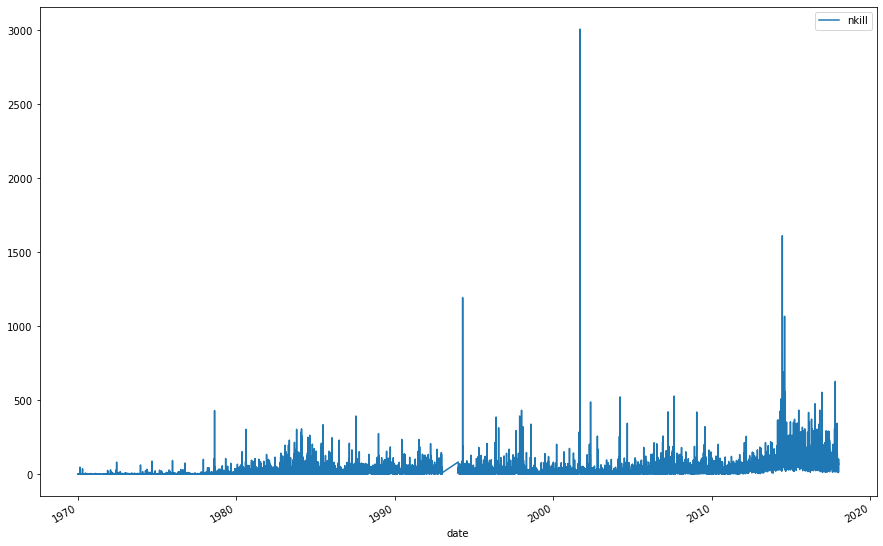

In [349]:
fig = plt.figure(figsize=(15,10))
pd.pivot_table(data = df , index='date', values = 'nkill',aggfunc='sum' ).plot(figsize = (15,10))
plt.show()

## DROPING REDUNDANT COLUMN WHICH WE NOT YEILD HAS ANY GOOD INFORMATION FOR ARE DATA ANALYSIS

In [528]:
drop2_columns = list(null_value_df.tail(20)['Columns'])
df.drop(drop2_columns,axis = 1,inplace = True)

In [537]:
drop3_columns = list(null_value_df.iloc[42:57]['Columns'])
df.drop(drop3_columns,axis = 1,inplace = True)

In [542]:
drop4_columns = list(null_value_df.iloc[85:97]['Columns'])
df.drop(drop4_columns,axis = 1,inplace = True)

In [548]:
drop5_columns = list(null_value_df.iloc[59:65]['Columns'])
df.drop(drop5_columns,axis = 1,inplace = True)

In [552]:
drop6_columns = list(null_value_df.iloc[74:81]['Columns'])
df.drop(drop6_columns,axis = 1,inplace = True)

In [558]:
drop7_columns = ['nkillus','nwoundus','propcomment','divert','nhostkidus','guncertain2','guncertain3','nperpcap']
df.drop(drop7_columns,axis = 1,inplace = True)

In [573]:
drop8_columns = ['nhours','ndays','natlty3_txt','weapdetail']
df.drop(drop8_columns,axis = 1,inplace = True)

In [632]:
drop9_columns = ['specificity','multiple','individual','nperps']
df.drop(drop9_columns,axis = 1,inplace = True)

In [644]:
drop10_columns = ['claimmode']
df.drop(drop10_columns,axis = 1,inplace = True)

In [655]:
drop11_columns = ['natlty1']
df.drop(drop11_columns,axis = 1,inplace = True)

In [656]:
df.head()

,eventid,iyear,imonth,iday,date,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1_txt,gname,guncertain1,claimed,claimmode_txt,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt,propvalue,ishostkid,nhostkid
0,197000000001,1970,7,2,1970-07-02,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,Dominican Republic,MANO-D,0.0,NaN,NaN,13,Unknown,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,0,NaN,0.0,0.0
1,197000000002,1970,1,1,1970-01-01,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0.0,NaN,NaN,13,Unknown,NaN,NaN,0.0,NaN,0.0,NaN,0,NaN,0,NaN,1.0,1.0
2,197001000001,1970,1,1,1970-01-01,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,Unknown,0.0,NaN,NaN,13,Unknown,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,0,NaN,0.0,0.0
3,197001000002,1970,1,1,1970-01-01,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,United States,Unknown,0.0,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,1,NaN,Unknown,NaN,0.0,0.0
4,197001000003,1970,1,1,1970-01-01,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,United States,Unknown,0.0,NaN,NaN,8,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Unknown,NaN,0.0,0.0


### NUMBER OF KIDS GETTING HOSTAGE

In [418]:
null_value_df[null_value_df['Columns'] == 'nhostkid']

,Columns,Null Value
110,nhostkid,92.530175


SO WHERE THERE IS NULL VALUE WE HAVE TO REPLACE IT WITH ZERO HAS NO KIDS WERE TAKEN HOSTAGE

In [419]:
df['nhostkid'].fillna(0,inplace =True)

In [420]:
df['nhostkid'].isnull().sum()

0

HENCE THERE ARE NO NULL VALUES REMAINING IN THE KIDS HOSTAGE SITUATION

### PROPERTY COLUMNS NULL VALUE ANALYSIS

In [456]:
print('Number of property Columns : ',prop.columns)
prop

Number of property Columns :  Index(['property', 'propextent', 'propextent_txt', 'propvalue'], dtype='object')


,property,propextent,propextent_txt,propvalue
0,0,NaN,NaN,NaN
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,1,NaN,NaN,NaN
4,1,NaN,NaN,NaN
...,...,...,...,...
181686,-9,NaN,NaN,NaN
181687,1,4.0,Unknown,-99.0
181688,1,4.0,Unknown,-99.0
181689,-9,NaN,NaN,NaN


WHERE THERE IS NO PROPERTY DAMAGE THEN WE NEED TO PROP VALUE =0 INSTEAD OF NULL VALUE

In [499]:
df['propvalue'].isnull().sum()/len(df)*100

78.54103945710024

In [508]:
x = prop[prop['property']==0]['propvalue'].fillna(value = 0,inplace = True)
x

In [505]:
prop['propvalue'].isnull().sum()/len(df)*100

78.54103945710024

In [496]:
null_value_df.iloc[107]

Columns       propvalue
Null Value    78.541039
Name: 107, dtype: object

In [477]:
df[df['attacktype1']==1]

,eventid,iyear,imonth,iday,date,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,1970-07-02,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
2,197001000001,1970,1,1,1970-01-01,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
6,197001020001,1970,1,2,1970-01-02,NaN,0,NaN,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,0,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of in...,218.0,Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tupamaros (Uruguay),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic firearm,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
25,197001200001,1970,1,20,1970-01-20,NaN,0,NaN,83,Guatemala,2,Central America & Caribbean,Guatemala,Guatemala City,14.622869,-90.529068,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,British consulate,"Bodyguard, British Consul",216.0,Great Britain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [478]:
pd.crosstab(df['attacktype1_txt'] , df['propextent_txt'])

propextent_txt,0,Catastrophic (likely >= $1 billion),Major (likely >= $1 million but < $1 billion),Minor (likely < $1 million),Unknown
attacktype1_txt,,,,,
Armed Assault,16474,0,66,6896,5438
Assassination,15353,0,0,2273,490
Bombing/Explosion,20628,2,605,26763,10836
Facility/Infrastructure Attack,404,0,205,5485,1504
Hijacking,401,4,2,165,46
Hostage Taking (Barricade Incident),212,0,15,317,197
Hostage Taking (Kidnapping),9198,0,9,856,518
Unarmed Assault,575,0,1,138,33
Unknown,3333,0,6,405,664


In [613]:
pd.pivot_table(data=df,values = 'propvalue',index=['attacktype1_txt','propextent_txt'],aggfunc='count')

propvalue
attacktype1_txt                     propextent_txt                                          
Armed Assault                       0                                                      0
                                    Major (likely >= $1 million but < $1 billion)         29
                                    Minor (likely < $1 million)                         5698
                                    Unknown                                              948
Assassination                       0                                                      0
                                    Minor (likely < $1 million)                         1764
                                    Unknown                                              132
Bombing/Explosion                   0                                                      0
                                    Catastrophic (likely >= $1 billion)                    2
                                    Major (likely >= $1 million but < $1 billion)        237
                                    Minor (likely < $1 million)                        19243
                                    Unknown                                             3830
Facility/Infrastructure Attack      0                                                      0
                                    Major (likely >= $1 million but < $1 billion)        128
                                    Minor (likely < $1 million)                         4225
                                    Unknown                                              642
Hijacking                           0                                                      0
                                    Catastrophic (likely >= $1 billion)                    0
                                    Major (likely >= $1 million but < $1 billion)          1
                                    Minor (likely < $1 million)                          151
                                    Unknown                                               22
Hostage Taking (Barricade Incident) 0                                                      0
                                    Major (likely >= $1 million but < $1 billion)         14
                                    Minor (likely < $1 million)                          300
                                    Unknown                                               40
Hostage Taking (Kidnapping)         0                                                      0
                                    Major (likely >= $1 million but < $1 billion)          4
                                    Minor (likely < $1 million)                          765
                                    Unknown                                              177
Unarmed Assault                     0                                                      0
                                    Major (likely >= $1 million but < $1 billion)          1
                                    Minor (likely < $1 million)                          113
                                    Unknown                                                9
Unknown                             0                                                      0
                                    Major (likely >= $1 million but < $1 billion)          4
                                    Minor (likely < $1 million)                          346
                                    Unknown                                              154

In [612]:
pd.pivot_table(data=df,values = 'propvalue',index=['attacktype1_txt','propextent_txt'],aggfunc='median')

propvalue
attacktype1_txt                     propextent_txt                                             
Armed Assault                       Major (likely >= $1 million but < $1 billion)  1.400000e+06
                                    Minor (likely < $1 million)                   -9.900000e+01
                                    Unknown                                       -9.900000e+01
Assassination                       Minor (likely < $1 million)                   -9.900000e+01
                                    Unknown                                       -9.900000e+01
Bombing/Explosion                   Catastrophic (likely >= $1 billion)            1.889560e+09
                                    Major (likely >= $1 million but < $1 billion)  1.864019e+06
                                    Minor (likely < $1 million)                   -9.900000e+01
                                    Unknown                                       -9.900000e+01
Facility/Infrastructure Attack      Major (likely >= $1 million but < $1 billion)  2.250000e+06
                                    Minor (likely < $1 million)                   -9.900000e+01
                                    Unknown                                       -9.900000e+01
Hijacking                           Major (likely >= $1 million but < $1 billion)  1.000000e+07
                                    Minor (likely < $1 million)                   -9.900000e+01
                                    Unknown                                       -9.900000e+01
Hostage Taking (Barricade Incident) Major (likely >= $1 million but < $1 billion)  2.188020e+06
                                    Minor (likely < $1 million)                   -9.900000e+01
                                    Unknown                                       -9.900000e+01
Hostage Taking (Kidnapping)         Major (likely >= $1 million but < $1 billion)  1.000000e+06
                                    Minor (likely < $1 million)                   -9.900000e+01
                                    Unknown                                       -9.900000e+01
Unarmed Assault                     Major (likely >= $1 million but < $1 billion)  1.245500e+06
                                    Minor (likely < $1 million)                   -9.900000e+01
                                    Unknown                                       -9.900000e+01
Unknown                             Major (likely >= $1 million but < $1 billion)  1.060000e+07
                                    Minor (likely < $1 million)                   -9.900000e+01
                                    Unknown                                       -9.900000e+01

In [616]:
df['propextent_txt'].fillna('Unknown',inplace=True)

# Renaming columns for better understanding

In [643]:
df.head(5)

,eventid,iyear,imonth,iday,date,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,claimed,claimmode,claimmode_txt,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt,propvalue,ishostkid,nhostkid
0,197000000001,1970,7,2,1970-07-02,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,NaN,NaN,NaN,13,Unknown,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,0,NaN,0.0,0.0
1,197000000002,1970,1,1,1970-01-01,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,NaN,NaN,NaN,13,Unknown,NaN,NaN,0.0,NaN,0.0,NaN,0,NaN,0,NaN,1.0,1.0
2,197001000001,1970,1,1,1970-01-01,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,NaN,NaN,NaN,13,Unknown,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,0,NaN,0.0,0.0
3,197001000002,1970,1,1,1970-01-01,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,1,NaN,Unknown,NaN,0.0,0.0
4,197001000003,1970,1,1,1970-01-01,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Unknown,NaN,0.0,0.0


In [657]:
old_names = list(df.columns)
len(old_names)

43

In [658]:
new_name = ['Event Id','Year','Month','Day','Date','MoreThan24hrs','Country Code','Country Name',
            'Region Code','Region Name','District','City','Latitude','Longitude','Success',
            'Suicide','Attack Type Code','Attack Type Name','Target Type Code','Target Type Name',
            'Target Subtype Code','Target Subtype Name','Corp','Target',
            'Target Nationality','Terror Organization Name','Gun','Claimed','Claim Mode',
            'Weapon Type Code','Weapon Type Name','Weapon Subtype Code','Weapon Subtype Name',
            'Killed','Killed Terrorist','Wounded','Wounded Terrorist','Property Damaged',
            'Property Code','Property Type','Property Value','Kids Hostage','No. Kids Hostage']

In [679]:
df.columns = new_name

In [680]:
df.head(5)

,Event Id,Year,Month,Day,Date,MoreThan24hrs,Country Code,Country Name,Region Code,Region Name,District,City,Latitude,Longitude,Success,Suicide,Attack Type Code,Attack Type Name,Target Type Code,Target Type Name,Target Subtype Code,Target Subtype Name,Corp,Target,Target Nationality,Terror Organization Name,Gun,Claimed,Claim Mode,Weapon Type Code,Weapon Type Name,Weapon Subtype Code,Weapon Subtype Name,Killed,Killed Terrorist,Wounded,Wounded Terrorist,Property Damaged,Property Code,Property Type,Property Value,Kids Hostage,No. Kids Hostage
0,197000000001,1970,7,2,1970-07-02,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,Dominican Republic,MANO-D,0.0,NaN,NaN,13,Unknown,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,0,NaN,0.0,0.0
1,197000000002,1970,1,1,1970-01-01,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0.0,NaN,NaN,13,Unknown,NaN,NaN,0.0,NaN,0.0,NaN,0,NaN,0,NaN,1.0,1.0
2,197001000001,1970,1,1,1970-01-01,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,Unknown,0.0,NaN,NaN,13,Unknown,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,0,NaN,0.0,0.0
3,197001000002,1970,1,1,1970-01-01,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,United States,Unknown,0.0,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,1,NaN,Unknown,NaN,0.0,0.0
4,197001000003,1970,1,1,1970-01-01,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,United States,Unknown,0.0,NaN,NaN,8,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Unknown,NaN,0.0,0.0


### SAVING UPDATED DATAFRAME

In [681]:
df.to_csv('New Global Terrorism.csv',index=False)

# DATA ANALYSIS

OUR NULL VALUE ANALYSIS IS COMPLETE AND NOW WE ARE GOING TO DO DATA ANALYSIS AND VISUAL ANALYSIS OF THE DATA

In [764]:
df1 = pd.read_csv('New Global Terrorism.csv')
df1

,Event Id,Year,Month,Day,Date,MoreThan24hrs,Country Code,Country Name,Region Code,Region Name,District,City,Latitude,Longitude,Success,Suicide,Attack Type Code,Attack Type Name,Target Type Code,Target Type Name,Target Subtype Code,Target Subtype Name,Corp,Target,Target Nationality,Terror Organization Name,Gun,Claimed,Claim Mode,Weapon Type Code,Weapon Type Name,Weapon Subtype Code,Weapon Subtype Name,Killed,Killed Terrorist,Wounded,Wounded Terrorist,Property Damaged,Property Code,Property Type,Property Value,Kids Hostage,No. Kids Hostage
0,197000000001,1970,7,2,1970-07-02,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,Dominican Republic,MANO-D,0.0,NaN,NaN,13,Unknown,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,0,NaN,0.0,0.0
1,197000000002,1970,1,1,1970-01-01,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0.0,NaN,NaN,13,Unknown,NaN,NaN,0.0,NaN,0.0,NaN,0,NaN,0,NaN,1.0,1.0
2,197001000001,1970,1,1,1970-01-01,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,Unknown,0.0,NaN,NaN,13,Unknown,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,0,NaN,0.0,0.0
3,197001000002,1970,1,1,1970-01-01,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,United States,Unknown,0.0,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,1,NaN,Unknown,NaN,0.0,0.0
4,197001000003,1970,1,1,1970-01-01,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,United States,Unknown,0.0,NaN,NaN,8,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Unknown,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,2017-12-31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,1,0,2,Armed Assault,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,Somalia,Al-Shabaab,0.0,1.0,Unknown,5,Firearms,5.0,Unknown Gun Type,1.0,0.0,2.0,0.0,-9,NaN,Unknown,NaN,0.0,0.0
181687,201712310029,2017,12,31,2017-12-31,0,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,Russia,Muslim extremists,0.0,0.0,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",2.0,0.0,7.0,0.0,1,4.0,Unknown,-99.0,0.0,0.0
181688,201712310030,2017,12,31,2017-12-31,0,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0.0,NaN,8,Incendiary,18.0,Arson/Fire,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,0.0,0.0
181689,201712310031,2017,12,31,2017-12-31,0,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,0,0,3,Bombing/Explosion,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,India,Unknown,0.0,0.0,NaN,6,Explosives,7.0,Grenade,0.0,0.0,0.0,0.0,-9,NaN,Unknown,NaN,0.0,0.0


#### SHAPE OF THE NEW DATAFRAME

In [761]:
df.shape

(181691, 43)

#### HOW MANY TERROR INCIDENT TOOK PLACE IN EACH YEAR (TOTAL)

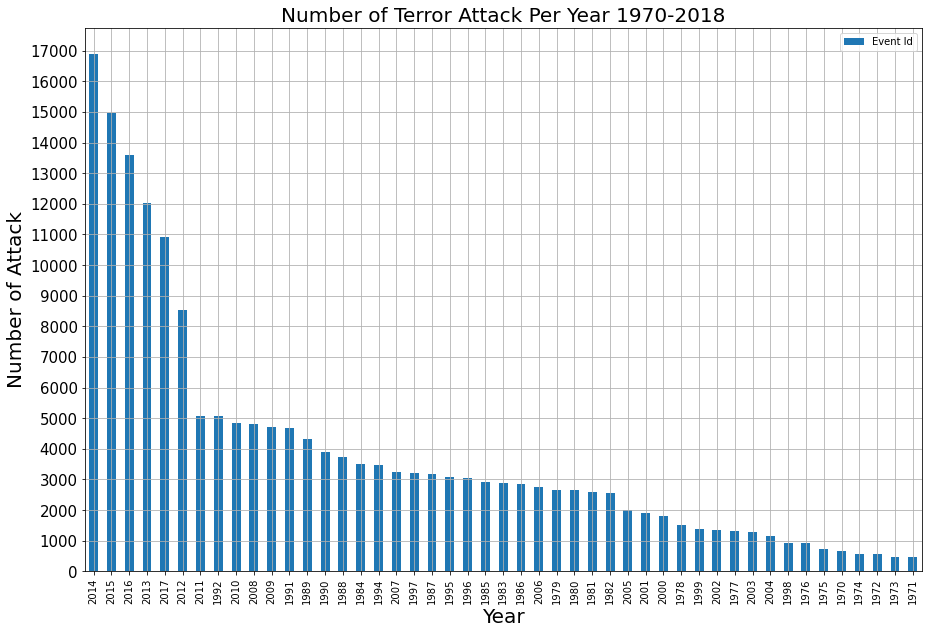

In [699]:
pd.pivot_table(data = df,index = 'Year',values ='Event Id' ,
               aggfunc='count').sort_values(by='Event Id',ascending=False).plot(kind ='bar',figsize = (15,10))

# figure title
plt.title('Number of Terror Attack Per Year 1970-2018',size = 20)

# x label and y label
plt.ylabel('Number of Attack',size = 20)
plt.xlabel('Year',size = 20)

# x ticks and y ticks
plt.yticks(np.arange(0,18000,1000),size = 15)
plt.grid(True)
plt.show()

#### COUNTRY WISE TERROR ATTACK IN DATAFRAME

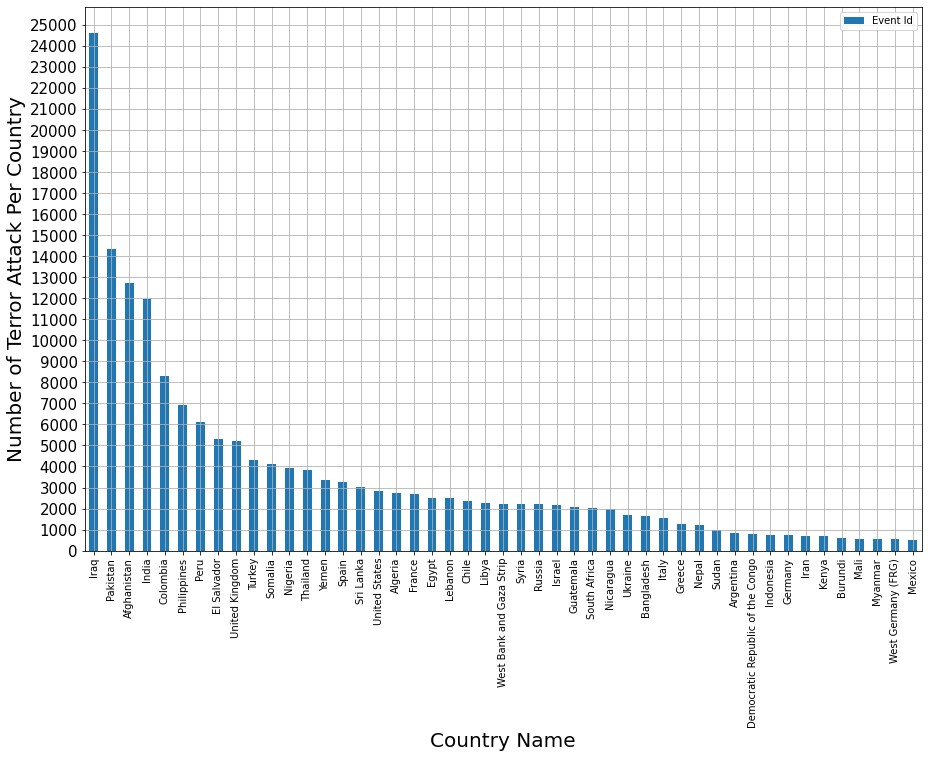

In [718]:
xb = pd.pivot_table(data = df,index = 'Country Name',values ='Event Id' ,
               aggfunc='count').sort_values(by='Event Id',ascending=False)
xb[xb['Event Id'] > 500].plot(kind = 'bar',figsize = (15,10))
    
# xlabel and ylabel
plt.ylabel('Number of Terror Attack Per Country',size = 20)
plt.xlabel('Country Name',size = 20)

# yticks
plt.yticks(np.arange(0,26000,1000),size = 15)

# GRID AND SHOW
plt.grid(True)
plt.show()

#### HOW MANY TERROR INCIDENT HAPPENED REGION WISE

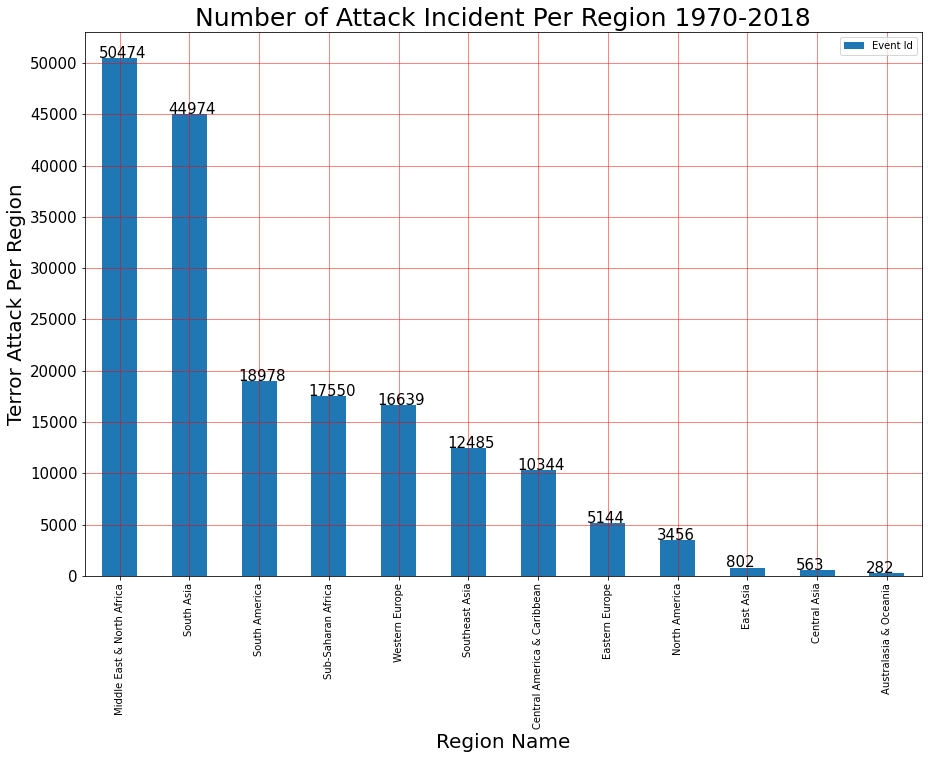

In [732]:
# Creating the Dataframe
xc = pd.pivot_table(data= df ,values= 'Event Id', index='Region Name' , aggfunc='count').sort_values(by = 'Event Id',ascending=False)

# Ploting the Value
xc.plot(kind = 'bar',figsize = (15,10))

# Adding value above the bar
for i in range(len(xc)):
    value = xc.iloc[i][0]
    plt.text(x = i-0.3,y = value+15 ,s = f"{value}",fontdict={'size':15})


# Title of the figure
plt.title('Number of Attack Incident Per Region 1970-2018',size = 25)

# ylabel and x label
plt.xlabel('Region Name',size = 20)
plt.ylabel('Terror Attack Per Region',size =20)

# yticks
plt.yticks(np.arange(0,55000,5000),size = 15)

# Grid and Show
plt.grid(True ,color = 'red',alpha = 0.6)
plt.show()

In [738]:
cabi = pd.pivot_table(data= df[df['Country Name']=='India'] , index='District' ,values = 'Killed' ,aggfunc = 'sum').sort_values(by = 'Killed' ,ascending=False)

In [739]:
cabi.head(15)

,Killed
District,
Jammu and Kashmir,4079.0
Punjab,2751.0
Assam,2112.0
Chhattisgarh,1465.0
Maharashtra,1010.0
Jharkhand,796.0
Bihar,765.0
Manipur,747.0
Unknown,673.0


In [756]:
fig = px.choropleth(data_frame=cabi ,locations= cabi.index,lat=cabi2['Latitude'],lon=cabi2['Longitude'],
                    color='Killed',scope ='asia')
fig.show()

ValueError: All arguments should have the same length. The length of argument `locations` is 35, whereas the length of  previously-processed arguments ['lat', 'lon'] is 11960

In [752]:
cabi2 = df[df['Country Name']=='India'][['District','Latitude','Longitude']].sort_values(by='District')
cabi3 = cabi2.iloc[:,1:].values

In [758]:
cabi2

,District,Latitude,Longitude
179599,Andhra Pradesh,17.973986,82.088374
74969,Andhra Pradesh,16.593801,79.737422
52824,Andhra Pradesh,15.912900,79.739988
74968,Andhra Pradesh,17.942675,82.047570
74928,Andhra Pradesh,16.686167,79.941782
...,...,...,...
103996,West Bengal,23.332078,86.365208
89847,West Bengal,25.019456,88.277440
176375,West Bengal,27.117166,88.583706
90476,West Bengal,26.494818,89.393793


In [760]:
df[df['Country Name']=='India']['District'].unique()

array(['Delhi', 'Bihar', 'Maharashtra', 'Assam', 'Manipur', 'Mizoram',
       'Andhra Pradesh', 'Unknown', 'Jharkhand', 'Tamil Nadu',
       'Uttar Pradesh', 'West Bengal', 'Nagaland', 'Gujarat',
       'Chandigarh', 'Rajasthan', 'Punjab', 'Chhattisgarh', 'Tripura',
       'Haryana', 'Jammu and Kashmir', 'Himachal Pradesh', 'Karnataka',
       'Uttaranchal', 'Madhya Pradesh', 'Orissa', 'Kerala', 'Odisha',
       'Meghalaya', 'Sikkim', 'Goa', 'Andhra pradesh',
       'Arunachal Pradesh', 'Puducherry', 'Telangana'], dtype=object)